In [2]:
# !pip install python-mecab-ko pyLDAvis

## cholesterolreview_negative

In [1]:
import numpy as np

In [2]:
# cholesterolreview_negative.csv
import pandas as pd
df_review_negative = pd.read_csv('../datasets/cholesterolreview_negative.csv')

In [3]:
df_review_negative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66 non-null     int64  
 1   _id               66 non-null     object 
 2   product_name      66 non-null     object 
 3   review_writer     66 non-null     object 
 4   review_date       66 non-null     object 
 5   review_star       66 non-null     float64
 6   review_content    66 non-null     object 
 7   tokenizer_review  66 non-null     object 
 8   replaced_review   66 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 4.8+ KB


In [4]:
df_review_negative = df_review_negative.dropna()

### LDA 분석

##### 문장 벡터화

In [5]:
from gensim.corpora import Dictionary

In [6]:
# df_review_negative dictionary
dictionary = Dictionary(df_review_negative[['replaced_review']].values)
dictionary

In [7]:
dictionary.doc2bow(df_review_negative[['replaced_review']].values[3])

[(3, 1)]

In [8]:
# dictionary에 의한 한글 문장을 벡터화 변환
corpus_list = list()
for sentence in df_review_negative[['replaced_review']].values :
  vectors = dictionary.doc2bow(sentence)
  corpus_list.append(vectors)

In [9]:
df_review_negative['문장벡터화'] = corpus_list

In [10]:
df_review_negative.columns

Index(['Unnamed: 0', '_id', 'product_name', 'review_writer', 'review_date',
       'review_star', 'review_content', 'tokenizer_review', 'replaced_review',
       '문장벡터화'],
      dtype='object')

##### 토픽 잡기
- review_negative.csv 토픽 분석
- 토픽 수 9

In [11]:
from gensim.models import LdaModel

In [12]:
lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=9)

In [13]:
lda_model.print_topics(num_words=4)

[(0,
  '0.206*"배송 빨르다 성능 성능 별로 유통 기한 기한 넉넉하다 박스 규칙 혈압 측정 복용 전과 복용 개월차 별다르다 개선" + 0.140*"기존 국내 제품 공구 판매 비싸다 성분 복용 해봤다 트러블" + 0.074*"싸다 구입 좀쌀 피부 가려움 일어나서 중지 중지 가려움증 성분 구입 택배" + 0.073*"배송 잘못 건지다 그렇다 박스 찌그러지다 찢기다 튀어나오다 몇개 귀찮다 버리다 이렇다 신경 써주다 짜증나다"'),
 (1,
  '0.110*"구매 쿄릭홍국 제품 품절 나서다 구매 몰리다 갑자기 가격 만원 올리다 판매 저렴하다 링크 남다 구매 하렵니" + 0.110*"이유 종근당 제품 문해 혈압 낮아지다 꾸다 그렇다 제품 다시 바꾸다 꾸준하다 복용 좋아지다 기대하다" + 0.110*"아프다 상품 괜찮다 보이다 맞다" + 0.110*"배송 성능 성능 별로 유통 기한 감마 리놀렌산 효능 어떻다 제약회사 제품 여성 갱년기 유독 상품 가격 높다 회사 비교 감마 리놀렌산 함유 높다 가격 높다 회사 제품 가격 새다 모르다 올리다 놨네 캡슐 판매 캡슐 줄이다 괘씸하다 다시다 구입 상세 상세 상세"'),
 (2,
  '0.137*"배송 느리다 성능 성능 뛰어나다 유통 기한 기한 넉넉하다 배송 느리다" + 0.137*"배송 빨르다 성능 성능 별로 유통 기한 기한 넉넉하다 전혀" + 0.137*"사다 배송 상태 기분 좋다" + 0.014*"배송 빨르다 성능 성능 별로 유통 기한 기한 넉넉하다 박스 규칙 혈압 측정 복용 전과 복용 개월차 별다르다 개선"'),
 (3,
  '0.110*"줄줄" + 0.110*"별로 좋다 사다 알약 넘다 넘어가다 걸리다 마냥 불편하다 알약 녹차 추출 물다 맞다 카페인 장기간 복용 우려 손상 손상 모르다 끊음 다이어트 쓰다 인용 청소년 사면 낭패" + 0.058*"배송 빨르다 성능 성능 별로 유통 기한 기한 넉넉하다 박스 규칙 혈압 측정 복용 전과 복용 개월차 별다르다 개선" + 0.058*"택배 박스 젖다 제품 괜찬을줄 안다 약품 

##### 최적에 토픽 단어 수

In [14]:
sentences = df_review_negative['replaced_review']
sentences

0     배송 성능 성능 별로 유통 기한 감마 리놀렌산 효능 어떻다 제약회사 제품 여성 갱년...
1                      배송 빨르다 성능 성능 별로 유통 기한 기한 넉넉하다 전혀
2                가격 괜찮다 배송 브리 캐나다 감마 리놀렌산 보라 오일 달맞이꽃 자유
3                   좋아지다 모르다 좋아지다 모르다 부작용 안나 는걸 여기다 야하다
4                                            성능 성능 뛰어나다
                            ...                        
61                                                   줄줄
62                     기존 국내 제품 공구 판매 비싸다 성분 복용 해봤다 트러블
63                 주문 해외 구매 대행 제품 반품 안되다 연락 안되다 차다 어이없다
64                                  복용 알다 그다지 크다 변화 모르다
65                                                가격 만원
Name: replaced_review, Length: 66, dtype: object

In [15]:
type(sentences)

pandas.core.series.Series

In [16]:
# 각 문장을 공백으로 나누어 리스트에 저장
tokenized_sentences = [sentence.split() for sentence in sentences]

In [17]:
# 결과 출력
morphs_list = list()
for tokens in tokenized_sentences:
    morphs_list.append(tokens)
morphs_list

[['배송',
  '성능',
  '성능',
  '별로',
  '유통',
  '기한',
  '감마',
  '리놀렌산',
  '효능',
  '어떻다',
  '제약회사',
  '제품',
  '여성',
  '갱년기',
  '유독',
  '상품',
  '가격',
  '높다',
  '회사',
  '비교',
  '감마',
  '리놀렌산',
  '함유',
  '높다',
  '가격',
  '높다',
  '회사',
  '제품',
  '가격',
  '새다',
  '모르다',
  '올리다',
  '놨네',
  '캡슐',
  '판매',
  '캡슐',
  '줄이다',
  '괘씸하다',
  '다시다',
  '구입',
  '상세',
  '상세',
  '상세'],
 ['배송', '빨르다', '성능', '성능', '별로', '유통', '기한', '기한', '넉넉하다', '전혀'],
 ['가격', '괜찮다', '배송', '브리', '캐나다', '감마', '리놀렌산', '보라', '오일', '달맞이꽃', '자유'],
 ['좋아지다', '모르다', '좋아지다', '모르다', '부작용', '안나', '는걸', '여기다', '야하다'],
 ['성능', '성능', '뛰어나다'],
 ['배송',
  '느리다',
  '성능',
  '성능',
  '별로',
  '유통',
  '기한',
  '보라',
  '오일',
  '달맞이꽃',
  '오일',
  '갱년기',
  '증상',
  '효능',
  '회사',
  '비교',
  '감마',
  '리놀렌산',
  '함유',
  '높다',
  '가격',
  '상당하다',
  '비싸다',
  '회사',
  '제품',
  '가격',
  '새다',
  '모르다',
  '올리다',
  '판매',
  '줄이다',
  '괘씸하다',
  '제품',
  '구입',
  '일류',
  '낱개',
  '포장',
  '보관',
  '온도',
  '중요하다',
  '제품',
  '저렴하다',
  '용량',
  '포장',
  '구입',
  '냉장고',
  '넣다',
  '상세',
  '상세',


In [18]:
preprocessed_sentences = morphs_list

In [19]:
dictionary = Dictionary(preprocessed_sentences) # fix in like sklean
dictionary

In [20]:
# 일관성 점수
from gensim.models.coherencemodel import CoherenceModel
coherenceModel = CoherenceModel(model=lda_model, texts=morphs_list, dictionary=dictionary)
coherenceModel.get_coherence()

0.4667772756266911

In [21]:
# 혼잡도 점수
lda_model.log_perplexity(corpus_list)

-6.079506459365107

In [22]:
start_topic = 2
end_topic = 10
coherence_scores = list()
perplexity_scores = list()
for topic_number in range(start_topic, end_topic+1):
    lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=topic_number) # fix
    coherenceModel = CoherenceModel(model=lda_model, texts=morphs_list, dictionary=dictionary)
    coherence_scores.append(coherenceModel.get_coherence()) # 일관성 점수
    perplexity_scores.append(lda_model.log_perplexity(corpus_list))

In [23]:
import pandas as pd
scores = pd.DataFrame([coherence_scores,  perplexity_scores]).T
scores

,0,1
0,0.505786,-6.367230
1,0.511727,-6.639334
2,0.477459,-6.847611
3,0.448536,-7.086476
4,0.437877,-7.114179
5,0.454742,-7.320379
6,0.462181,-7.499555
7,0.444289,-7.607397
8,0.447389,-7.701673


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

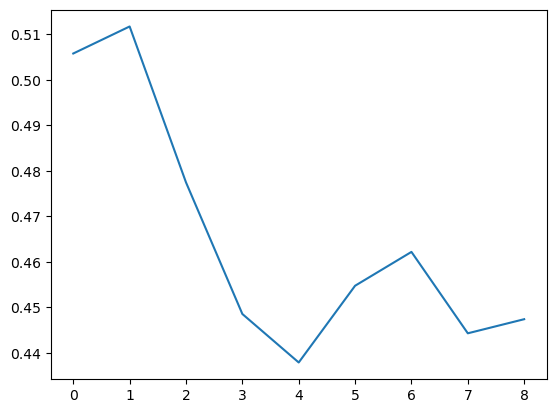

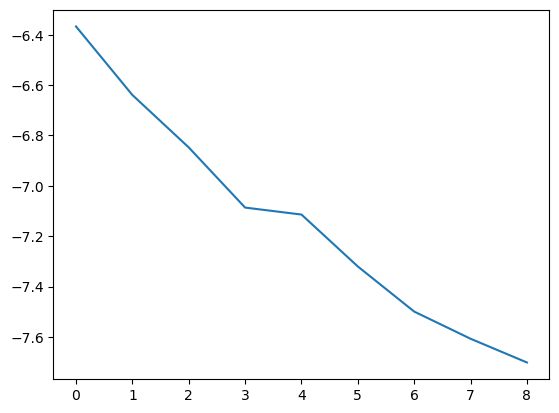

In [25]:
sns.lineplot(coherence_scores)
plt.show()
sns.lineplot(perplexity_scores)
plt.show()

##### LDA 시각화(review_negative)

In [26]:
# %pip install pyLDAvis

In [27]:
import pyLDAvis.gensim_models

In [28]:
pyLDAvis.enable_notebook() # 일반적인 python에선 불필요
result_visualized = pyLDAvis.gensim_models.prepare(lda_model, corpus_list, dictionary)

In [29]:
pyLDAvis.display(result_visualized)

In [30]:
# review_negative_result_visualized.html
pyLDAvis.save_html(result_visualized, '../datasets/cholesterolreview_negative_result_visualized.html')

## cholesterolreview_positive

In [31]:
import pandas as pd
df_review_positive = pd.read_csv('../datasets/cholesterolreview_positive.csv')

In [32]:
df_review_positive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6205 entries, 0 to 6204
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        6205 non-null   int64  
 1   _id               6205 non-null   object 
 2   product_name      6205 non-null   object 
 3   review_writer     6205 non-null   object 
 4   review_date       6205 non-null   object 
 5   review_star       6205 non-null   float64
 6   review_content    6205 non-null   object 
 7   tokenizer_review  6205 non-null   object 
 8   replaced_review   6187 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 436.4+ KB


In [33]:
df_review_positive = df_review_positive.dropna()

### LDA 분석

##### 문장 벡터화

In [34]:
# 'replaced_review' 열의 모든 값을 문자열로 변환
df_review_positive['replaced_review'] = df_review_positive['replaced_review'].astype(str)

In [34]:
dictionary = Dictionary(df_review_positive[['replaced_review']].values)
dictionary

In [35]:
# dictionary에 의한 한글 문장을 벡터화 변환
corpus_list = list()
for sentence in df_review_positive[['replaced_review']].values :
  vectors = dictionary.doc2bow(sentence)
  corpus_list.append(vectors)

In [36]:
df_review_positive['문장벡터화'] = corpus_list

In [37]:
df_review_positive[:3]

,Unnamed: 0,_id,product_name,review_writer,review_date,review_star,review_content,tokenizer_review,replaced_review,문장벡터화
0,0,650d8884b2af41f5ca5ba6aa,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,지오됴됴,2021.03.19,5.0,배송 빨라요 성능 보통이에요 유통기한 기한이 넉넉해요\n감마리놀렌산이 여성에게 좋다...,"['배송', '빨르다', '성능', '유통', '기한', '기한', '넉넉하다', ...",배송 빨르다 성능 유통 기한 기한 넉넉하다 감마 리놀렌산 여성 좋다 다해 초록색 비...,"[(0, 1)]"
1,1,650d8884b2af41f5ca5ba6ab,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,ju82**,2023.07.05,5.0,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\n두번째 구입입...,"['유통', '기한', '기한', '넉넉하다', '포장', '상태', '포장', '...",유통 기한 기한 넉넉하다 포장 상태 포장 깔끔하다 좋다 두번째 구입 월경 증후군 구...,"[(1, 1)]"
2,2,650d8884b2af41f5ca5ba6ac,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,sns2**,2023.09.20,5.0,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\n유트브 보고 ...,"['유통', '기한', '기한', '넉넉하다', '포장', '상태', '포장', '...",유통 기한 기한 넉넉하다 포장 상태 포장 깔끔하다 좋다 유트브 구매 피부 염증 좋다...,"[(2, 1)]"


##### 토픽 잡기
- review_positive.csv 토픽 분석
- 토픽 수 9

In [38]:
lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=9)

In [39]:
lda_model.print_topics(num_words=4)

[(0,
  '0.004*"가격 괜찮다 배송" + 0.004*"배송 빨르다 성능 성능 뛰어나다 유통 기한 기한 넉넉하다 고지혈증 구입 복용" + 0.004*"배송 빨르다 성능 유통 기한 기한 넉넉하다 혈압 좋다 모르다" + 0.004*"배송 빨르다 성능 성능 뛰어나다 유통 기한 기한 넉넉하다 콜레스테롤 치가 높다 도움 후기 구매 후기 다시 올리다"'),
 (1,
  '0.079*"유통 기한 기한 넉넉하다 포장 상태 포장 깔끔하다 좋다" + 0.034*"좋다 좋다" + 0.031*"배송 성능 유통 기한" + 0.003*"배송 빨르다 성능 성능 뛰어나다 유통 기한 기한 넉넉하다 60 고혈압 남편 꾸준하다 좋다 가격 구매 부담 줄어들다 좋다 확실하다 혈행 개선 도움 유통 기한 24년 3월 20일 넉넉하다 제품 빠르다 보내다 감사하다 상세 상세 상세"'),
 (2,
  '0.015*"배송 빨르다 성능 유통 기한" + 0.012*"배송 성능 성능 뛰어나다 유통 기한 기한 넉넉하다" + 0.004*"신기하다 혈압 높다 드리다 복용 안되다 혈압 148 병원 서재 127 78 정상 수치 좋아하다 장기 복용" + 0.004*"유통 기한 기한 넉넉하다 포장 상태 포장 깔끔하다 좋다 벌써 두번째 구입 가족 복용 뛰어나다 느끼다 믿다 당분간 꾸준하다 복용 알약 삼키다 편하다 부드럽다 필요하다 성분 좋다 상세 상세"'),
 (3,
  '0.014*"유통 기한 기한 넉넉하다 포장 상태 포장 깔끔하다" + 0.013*"가격 괜찮다 배송" + 0.012*"가격 괜찮다 배송 빨르다" + 0.010*"배송 빨르다 성능 성능 뛰어나다 유통 기한 기한 넉넉하다 좋다"'),
 (4,
  '0.142*"배송 빨르다 성능 성능 뛰어나다 유통 기한 기한 넉넉하다" + 0.030*"불편하다" + 0.013*"배송 빨르다 성능 유통 기한 기한 넉넉하다" + 0.004*"가격 싸다 사다 배송 빨르다"'),
 (5,
  '0.037*"모르다 꾸준하다" + 0.014*"가격 싸다 사다 배송 빨르다" + 0.01

##### 최적에 토픽 단어 수

In [40]:
sentences = df_review_positive['replaced_review']
sentences

0       배송 빨르다 성능 유통 기한 기한 넉넉하다 감마 리놀렌산 여성 좋다 다해 초록색 비...
1       유통 기한 기한 넉넉하다 포장 상태 포장 깔끔하다 좋다 두번째 구입 월경 증후군 구...
2       유통 기한 기한 넉넉하다 포장 상태 포장 깔끔하다 좋다 유트브 구매 피부 염증 좋다...
3       유통 기한 기한 넉넉하다 포장 상태 포장 깔끔하다 크다 모르다 상세 판매 답글 판매...
4       배송 빨르다 성능 성능 뛰어나다 유통 기한 기한 넉넉하다 케이스 보내다 달라 확인 ...
                              ...                        
6200                                                 만족하다
6201                                    사이트 빠르다 배송 돼다 추하다
6202                                    고양이 유미 고양이 먹이다 사다
6203                                            배송 빠르다 좋다
6204                                                상품 배송
Name: replaced_review, Length: 6188, dtype: object

In [41]:
type(sentences)

pandas.core.series.Series

In [42]:
# 각 문장을 공백으로 나누어 리스트에 저장
tokenized_sentences = [sentence.split() for sentence in sentences]

In [43]:
# 결과 출력
morphs_list = list()
for tokens in tokenized_sentences:
    morphs_list.append(tokens)
morphs_list

[['배송',
  '빨르다',
  '성능',
  '유통',
  '기한',
  '기한',
  '넉넉하다',
  '감마',
  '리놀렌산',
  '여성',
  '좋다',
  '다해',
  '초록색',
  '비교',
  '해보다',
  '브리',
  '결정',
  '함량',
  '높다',
  '과정',
  '마음',
  '믿다',
  '구매',
  '좋다',
  '알약',
  '개봉시',
  '터지다',
  '주의',
  '껍질',
  '제거',
  '습관',
  '누르다',
  '터지다',
  '얼른',
  '양제',
  '실선',
  '좋다',
  '가위',
  '상세',
  '상세'],
 ['유통',
  '기한',
  '기한',
  '넉넉하다',
  '포장',
  '상태',
  '포장',
  '깔끔하다',
  '좋다',
  '두번째',
  '구입',
  '월경',
  '증후군',
  '구입',
  '100',
  '모르다',
  '영향',
  '다시',
  '주문',
  '알약',
  '크기',
  '크다',
  '편입',
  '상세',
  '상세',
  '상세',
  '판매',
  '답글',
  '판매',
  '2023.07',
  '17',
  '안녕하다',
  '고객',
  '브리',
  '제품',
  '구매',
  '해주다',
  '대단하다',
  '감사하다',
  '브리',
  '제품',
  '고객',
  '건강',
  '많다',
  '도움',
  '좋다',
  '문의사항',
  '연락',
  '줄다',
  '감사하다',
  '브리',
  '올리다'],
 ['유통',
  '기한',
  '기한',
  '넉넉하다',
  '포장',
  '상태',
  '포장',
  '깔끔하다',
  '좋다',
  '유트브',
  '구매',
  '피부',
  '염증',
  '좋다',
  '판매',
  '답글',
  '판매',
  '2023.09',
  '21',
  '안녕하다',
  '고객',
  '브리',
  '제품',
  '구매',
  '해주다',
  '대단하다',
  '

In [44]:
preprocessed_sentences = morphs_list

In [45]:
dictionary = Dictionary(preprocessed_sentences) # fix in like sklean
dictionary

In [46]:
# 일관성 점수
from gensim.models.coherencemodel import CoherenceModel
coherenceModel = CoherenceModel(model=lda_model, texts=morphs_list, dictionary=dictionary)
coherenceModel.get_coherence()

0.6374812945250808

In [47]:
# 혼잡도 점수
lda_model.log_perplexity(corpus_list)

-17.080222528718515

In [48]:
start_topic = 2
end_topic = 10
coherence_scores = list()
perplexity_scores = list()
for topic_number in range(start_topic, end_topic+1):
    lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=topic_number) # fix
    coherenceModel = CoherenceModel(model=lda_model, texts=morphs_list, dictionary=dictionary)
    coherence_scores.append(coherenceModel.get_coherence()) # 일관성 점수
    perplexity_scores.append(lda_model.log_perplexity(corpus_list))

In [49]:
import pandas as pd
scores = pd.DataFrame([coherence_scores,  perplexity_scores]).T
scores

,0,1
0,0.469127,-9.797425
1,0.460251,-10.043391
2,0.543188,-10.272880
3,0.595254,-10.477221
4,0.603415,-10.704687
5,0.629237,-14.300479
6,0.611653,-16.587384
7,0.620573,-17.838555
8,0.640109,-18.967323


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\04-02\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\04-02\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\04-02\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\04-02\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

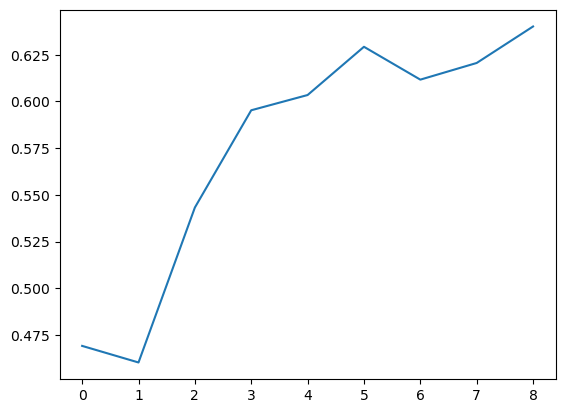

C:\Users\04-02\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\04-02\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\04-02\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\04-02\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

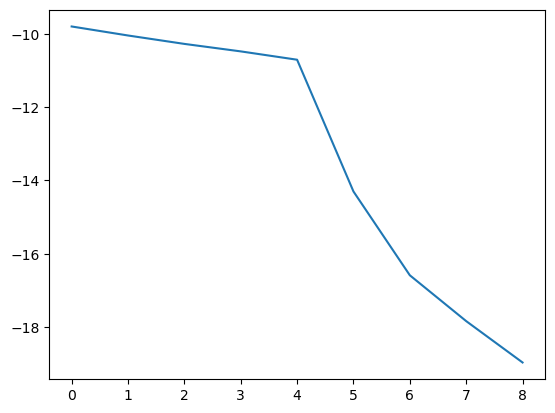

In [51]:
sns.lineplot(coherence_scores)
plt.show()
sns.lineplot(perplexity_scores)
plt.show()

##### LDA 시각화

In [52]:
pyLDAvis.enable_notebook() # 일반적인 python에선 불필요
result_visualized = pyLDAvis.gensim_models.prepare(lda_model, corpus_list, dictionary)

In [53]:
pyLDAvis.display(result_visualized)

In [54]:
pyLDAvis.save_html(result_visualized, '../datasets/cholesterolreview_positive_result_visualized.html')